In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [2]:
Company = pd.read_csv('CompanyFRA.csv')

#Glimpse of Data
Company.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


#### Fixing messy column names (containing spaces) for ease of use

In [3]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

#### Checking top 5 rows again

In [4]:
Company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [5]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


#### Checking datatype of all columns

In [6]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

#### Creating a binary target variable using 'Networth_Next_Year' 

In [7]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

#### Checking top 10 rows

In [8]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,395.3
1,0,36.2
2,0,84.0
3,0,2041.4
4,0,41.8
5,0,291.5
6,0,93.3
7,0,985.1
8,0,188.6
9,0,229.6


In [9]:
Company['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

#### Checking proportion of default

In [10]:
Company['default'].value_counts(normalize = True)

0    0.787594
1    0.212406
Name: default, dtype: float64

#### Lets check for missing values in the dataset

In [11]:
Company.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

In [12]:
Company.size

221312

In [13]:
Company.isnull().sum().sum()

17778

In [14]:
17778/221312

0.08033003181029497

There are missing values in the dataset

In [15]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [16]:
Company_X

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,4252,0.2,0.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.4,NaN
4252,4253,93.3,159.6,86.7,172.9,0.1,169.7,3.3,18.4,3.7,...,1.80,11.00,8.28,9.88,8162700.0,10.0,0.42,0.42,159.6,16.81
4253,4254,932.2,833.8,664.6,2314.7,32.1,2151.6,195.2,348.4,303.0,...,6.08,59.28,31.14,9.87,7479762.0,10.0,26.58,26.58,833.8,5.69
4254,4255,64.6,95.0,48.5,110.5,4.6,113.5,1.6,9.7,2.6,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.0,NaN


#### Let's check the number of outliers per column

In [17]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [18]:
((Company_X > UL) | (Company_X < LL)).sum()

Num                                                 0
Networth_Next_Year                                624
Total_assets                                      585
Net_worth                                         595
Total_income                                      508
Change_in_stock                                   750
Total_expenses                                    518
Profit_after_tax                                  712
PBDITA                                            584
PBT                                               704
Cash_profit                                       627
PBDITA_as_perc_of_total_income                    346
PBT_as_perc_of_total_income                       546
PAT_as_perc_of_total_income                       610
Cash_profit_as_perc_of_total_income               426
PAT_as_perc_of_net_worth                          427
Sales                                             500
Income_from_fincial_services                      517
Other_income                

In [19]:
((Company_X > UL) | (Company_X < LL)).sum().sum()

25946

In [20]:
25946/221312

0.1172372035858878

In [21]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [22]:
Company_X.isnull().sum()

Num                                                  0
Networth_Next_Year                                 624
Total_assets                                       585
Net_worth                                          595
Total_income                                       739
Change_in_stock                                   1300
Total_expenses                                     683
Profit_after_tax                                   866
PBDITA                                             738
PBT                                                858
Cash_profit                                        781
PBDITA_as_perc_of_total_income                     425
PBT_as_perc_of_total_income                        625
PAT_as_perc_of_total_income                        689
Cash_profit_as_perc_of_total_income                505
PAT_as_perc_of_net_worth                           427
Sales                                              805
Income_from_fincial_services                      1628
Other_inco

In [23]:
Company_X.isnull().sum().sum()

43724

In [24]:
43724/221312

0.19756723539618276

In [25]:
Company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
count,4256.000000,4256.000000,4.256000e+03,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4.256000e+03,1629.000000,4256.000000
mean,2128.500000,1344.740883,3.573617e+03,1351.949601,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,-196.217467,-197.527608,3.573617e+03,55.462290,0.212406
std,1228.745702,15936.743168,3.007444e+04,12961.311651,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,13061.953425,13061.929512,3.007444e+04,1304.445296,0.409059
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000,0.000000
25%,1064.750000,3.975000,9.130000e+01,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,9.130000e+01,2.970000,0.000000
50%,2128.500000,72.100000,3.155000e+02,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,3.155000e+02,8.690000,0.000000
75%,3192.250000,330.825000,1.120800e+03,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1.120800e+03,17.000000,0.000000
max,4256.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000,1.000000


In [26]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
count,4256.00,4256.00,4256.00,4256.00,4025.00,3706.00,4091.00,4102.00,4102.00,4102.00,...,3382.00,3492.00,3828.00,3446.00,3446.00,4256.00,4256.00,4256.00,1629.00,4256.00
mean,2128.50,1344.74,3573.62,1351.95,4688.19,43.70,4356.30,295.05,605.94,410.26,...,84.37,28.68,17.73,23764909.56,-1094.83,-196.22,-197.53,3573.62,55.46,0.21
std,1228.75,15936.74,30074.44,12961.31,53918.95,436.92,51398.09,3079.90,5646.23,4217.42,...,562.64,169.65,343.13,170979041.33,34101.36,13061.95,13061.93,30074.44,1304.45,0.41
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64,0.00
25%,1064.75,3.98,91.30,31.48,107.10,-1.80,96.80,0.50,6.93,0.80,...,8.19,5.10,3.02,1308382.50,10.00,0.00,0.00,91.30,2.97,0.00
50%,2128.50,72.10,315.50,104.80,455.10,1.60,426.80,9.00,36.90,12.60,...,17.32,9.86,6.41,4750000.00,10.00,1.49,1.24,315.50,8.69,0.00
75%,3192.25,330.82,1120.80,389.85,1485.00,18.40,1395.70,53.30,158.70,74.17,...,40.01,20.24,11.82,10906020.00,10.00,10.00,7.62,1120.80,17.00,0.00
max,4256.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74,1.00


In [27]:
Company_X = Company_X.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

In [28]:
Company_X.shape

(4256, 48)

In [29]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

#### Let's visually inspect the missing values in our data

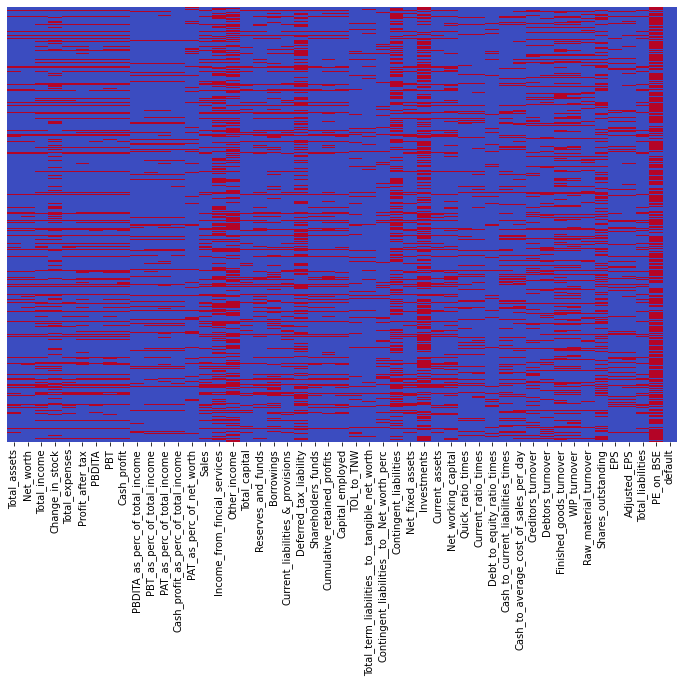

In [30]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [31]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

PE_on_BSE                                        0.67
Investments                                      0.51
Other_income                                     0.46
Contingent_liabilities                           0.42
Deferred_tax_liability                           0.42
Income_from_fincial_services                     0.38
Change_in_stock                                  0.31
Shares_outstanding                               0.30
Finished_goods_turnover                          0.30
WIP_turnover                                     0.27
Borrowings                                       0.23
Profit_after_tax                                 0.20
PBT                                              0.20
Net_working_capital                              0.20
Creditors_turnover                               0.20
Sales                                            0.19
Debtors_turnover                                 0.19
Cash_profit                                      0.18
Cumulative_retained_profits 

#### Dropping columns with more than 40% missing values 

In [32]:
Company_sub2 = Company_sub1.drop(['PE_on_BSE','Investments', 'Other_income', 'Contingent_liabilities', 
                             'Deferred_tax_liability'], axis = 1)

In [33]:
Company_sub2.shape

(4256, 44)

#### Segregate the predictors and response 

In [34]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

#### Scale the predictors 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [36]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [37]:
Company_sub3.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WI

In [38]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(Company_sub3, test_size = 0.3, stratify = Company_sub3.default)

#### Imputing the remaining missing values

In [39]:
from sklearn.impute import KNNImputer

In [40]:
imputer = KNNImputer(n_neighbors=7)

In [41]:
Company_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
Company_imputed_test = pd.DataFrame(imputer.fit_transform(Test), columns = Test.columns)

In [42]:
Company_imputed_train.isnull().sum().sum()
Company_imputed_test.isnull().sum().sum()

0

#### Inspect possible correlations between independent variables 

<AxesSubplot:>

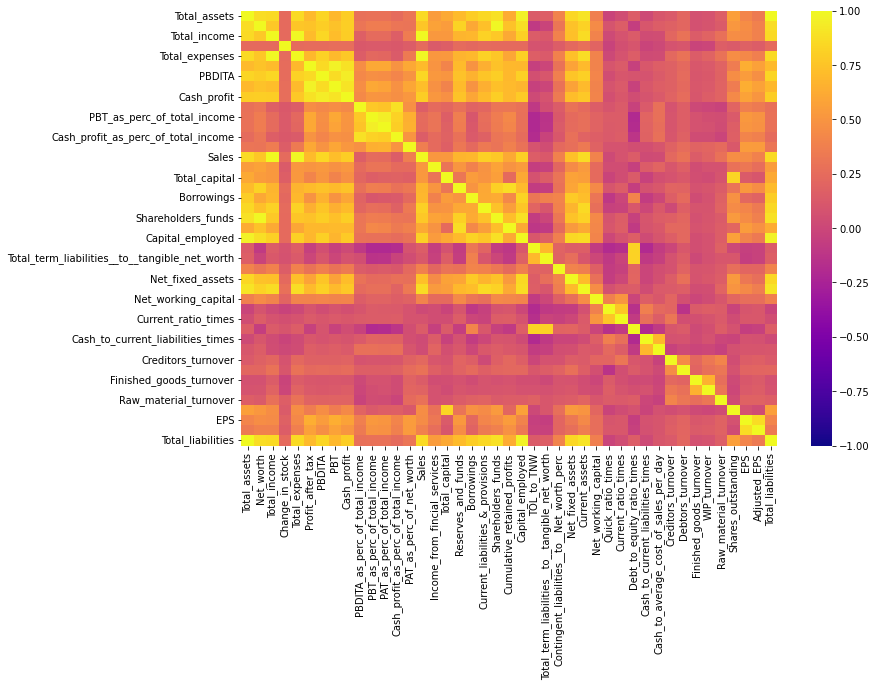

In [44]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed_train.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [45]:
X_train = Company_imputed_train.drop('default', axis = 1)
y_train = Company_imputed_train['default']
X_test =  Company_imputed_test.drop('default', axis = 1)
y_test = Company_imputed_test['default']

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [47]:
LogR = LogisticRegression()

In [48]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [49]:
selector = selector.fit(X_train, y_train)

In [50]:
selector.n_features_

15

In [51]:
selector.ranking_

array([ 1,  1,  1,  6,  1, 25,  1,  2,  1,  5,  1, 29,  1, 26,  8, 22,  4,
        1, 12, 28,  1, 11,  1, 15, 17,  3, 23,  1,  7, 24,  1, 16, 13, 14,
       21, 20, 18, 19,  9, 27, 10,  1,  1])

In [52]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Total_assets,1
1,Net_worth,1
2,Total_income,1
4,Total_expenses,1
6,PBDITA,1
8,Cash_profit,1
10,PBT_as_perc_of_total_income,1
12,Cash_profit_as_perc_of_total_income,1
17,Reserves_and_funds,1
20,Shareholders_funds,1


#### Validating the model on train and test set 

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [55]:
print(confusion_matrix(y_train, pred_train))

[[2344    2]
 [ 628    5]]


In [56]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      2346
         1.0       0.71      0.01      0.02       633

    accuracy                           0.79      2979
   macro avg       0.75      0.50      0.45      2979
weighted avg       0.77      0.79      0.70      2979



In [57]:
print(confusion_matrix(y_test, pred_test))

[[1004    2]
 [ 269    2]]


In [58]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1006
         1.0       0.50      0.01      0.01       271

    accuracy                           0.79      1277
   macro avg       0.64      0.50      0.45      1277
weighted avg       0.73      0.79      0.70      1277



We see poor recall score for both train and test

In [59]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [60]:
selector_smote = selector.fit(X_res, y_res)

In [61]:
selector_smote.n_features_

15

In [62]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [63]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56      2346
         1.0       0.56      0.57      0.57      2346

    accuracy                           0.56      4692
   macro avg       0.56      0.56      0.56      4692
weighted avg       0.56      0.56      0.56      4692



In [64]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67      1006
         1.0       0.24      0.50      0.32       271

    accuracy                           0.55      1277
   macro avg       0.52      0.53      0.49      1277
weighted avg       0.69      0.55      0.59      1277



In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [68]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [69]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [70]:
print(confusion_matrix(y_train, pred_train))

[[1301 1045]
 [ 282  351]]


In [71]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.82      0.55      0.66      2346
         1.0       0.25      0.55      0.35       633

    accuracy                           0.55      2979
   macro avg       0.54      0.55      0.50      2979
weighted avg       0.70      0.55      0.60      2979



In [72]:
print(confusion_matrix(y_test, pred_test))

[[569 437]
 [136 135]]


In [73]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67      1006
         1.0       0.24      0.50      0.32       271

    accuracy                           0.55      1277
   macro avg       0.52      0.53      0.49      1277
weighted avg       0.69      0.55      0.59      1277



## END